In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr


import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_excel("/Users/tfai/Documents/GitHub/Minimal-Lung-Model/Image_Analysis/image_data_complete_oldMLI.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   indx                       424 non-null    int64  
 1   day                        424 non-null    int64  
 2   slide                      424 non-null    int64  
 3   subslide                   424 non-null    int64  
 4   tissue area fraction       424 non-null    float64
 5   length of tissue (px)      424 non-null    int64  
 6   width of tissue (px)       424 non-null    float64
 7   number_of_lumens           424 non-null    int64  
 8   R_equiv                    424 non-null    float64
 9   Rmidpoint                  424 non-null    float64
 10  T_tilde                    424 non-null    float64
 11  area of tissue (px^2)      424 non-null    float64
 12  area of tissue se1         424 non-null    float64
 13  area of tissue se2         424 non-null    float64

In [4]:
# take only what you need for lumen analysis
df2 = df.loc[:,['corrected_lumens', 'number_of_lumens','num_int_lumens_p_half_ext']]

#rename columns for convenience
df2 = df2.rename(columns={"corrected_lumens": "corrected", "number_of_lumens": "raw", "num_int_lumens_p_half_ext": "manual"})



In [5]:
df2.corr()

,corrected,raw,manual
corrected,1.000000,0.999926,0.995881
raw,0.999926,1.000000,0.995718
manual,0.995881,0.995718,1.000000


In [6]:
pearsonr(df2.iloc[:,1],df2.iloc[:,2])

PearsonRResult(statistic=0.9957180452328355, pvalue=0.0)

In [7]:
rho = df2.corr()
df2.corr(method=lambda x, y: pearsonr(x, y)[1])

,corrected,raw,manual
corrected,1.0,0.0,0.0
raw,0.0,1.0,0.0
manual,0.0,0.0,1.0


In [8]:
from scipy.stats import wasserstein_distance

In [9]:
wasserstein_distance(df2.loc[:,'manual'],df2.loc[:,'raw'])

13.020047169811322

In [10]:
wasserstein_distance(df2.loc[:,'manual'],df2.loc[:,'corrected'])

2.3405205767031587

In [11]:
df2 = df2.assign(error_corrected_count = lambda x: (abs(x['corrected']-x['manual']) /x['manual']))

df2 = df2.assign(error_original_count = lambda x: (abs(x['raw']-x['manual']) /x['manual']))


In [12]:
df2['mse_corrected'] = mean_squared_error(df2['corrected'], df2['manual'])

df2['mse_raw'] = mean_squared_error(df2['raw'], df2['manual'])



In [13]:
df2.describe()

,corrected,raw,manual,error_corrected_count,error_original_count,mse_corrected,mse_raw
count,424.000000,424.000000,424.000000,424.000000,424.000000,4.240000e+02,4.240000e+02
mean,60.467262,75.827830,62.807783,0.040282,0.219411,8.831953e+00,1.762600e+02
std,18.705512,21.129927,19.325113,0.025989,0.052562,3.556911e-15,2.845528e-14
min,19.229670,28.000000,20.000000,0.000000,0.109005,8.831953e+00,1.762600e+02
25%,46.379501,60.000000,48.000000,0.020273,0.180277,8.831953e+00,1.762600e+02
50%,59.121948,74.500000,61.250000,0.038041,0.213115,8.831953e+00,1.762600e+02
75%,74.040680,91.250000,77.500000,0.056555,0.246893,8.831953e+00,1.762600e+02
max,143.077037,167.000000,149.000000,0.135626,0.450000,8.831953e+00,1.762600e+02


In [16]:
df.columns

Index(['indx', 'day', 'slide', 'subslide', 'tissue area fraction',
       'length of tissue (px)', 'width of tissue (px)', 'number_of_lumens',
       'R_equiv', 'Rmidpoint', 'T_tilde', 'area of tissue (px^2)',
       'area of tissue se1', 'area of tissue se2', 'area of tissue se3',
       'area of tissue se4', 'area of tissue se5', 'area of tissue se6',
       'area of tissue se7', 'area of tissue se8', 'area of tissue se9',
       'area of tissue se10', 'AN Tx', 'Ventilation', 'MLI', 'MLI_edit pics',
       'num_int_lumens_p_half_ext', 'num_int_lumens', 'total_int_lumen_area',
       'meanR_equiv_int', 'Rmidpoint_int', 'T_int', 'corrected_lumens'],
      dtype='object')

In [70]:
df2['day'] = df['day']

df2['ventilation'] = df['Ventilation']
df2['AN Tx'] = df['AN Tx']
df2['indx'] = df['indx']
df2['area']=np.log(df['total_int_lumen_area']/df['num_int_lumens_p_half_ext'])

In [69]:
df2.describe()

,corrected,raw,manual,error_corrected_count,error_original_count,mse_corrected,mse_raw,day,indx,area
count,424.000000,424.000000,424.000000,424.000000,424.000000,4.240000e+02,4.240000e+02,424.000000,424.000000,424.000000
mean,60.467262,75.827830,62.807783,0.040282,0.219411,8.831953e+00,1.762600e+02,3.582547,317.547170,66242.501164
std,18.705512,21.129927,19.325113,0.025989,0.052562,3.556911e-15,2.845528e-14,3.503160,190.444727,24721.109786
min,19.229670,28.000000,20.000000,0.000000,0.109005,8.831953e+00,1.762600e+02,0.000000,0.000000,13675.700000
25%,46.379501,60.000000,48.000000,0.020273,0.180277,8.831953e+00,1.762600e+02,0.000000,147.750000,49376.039528
50%,59.121948,74.500000,61.250000,0.038041,0.213115,8.831953e+00,1.762600e+02,7.000000,329.500000,62303.755670
75%,74.040680,91.250000,77.500000,0.056555,0.246893,8.831953e+00,1.762600e+02,7.000000,484.250000,80057.576642
max,143.077037,167.000000,149.000000,0.135626,0.450000,8.831953e+00,1.762600e+02,7.000000,633.000000,164337.609756


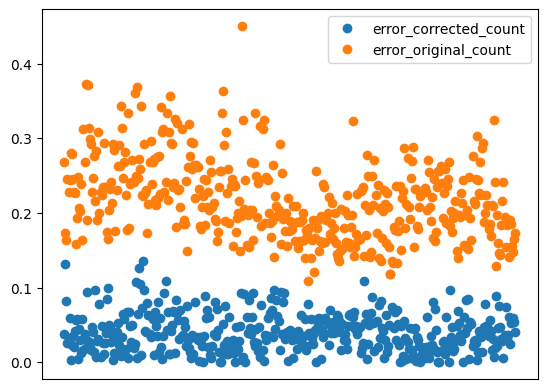

In [14]:
fig, ax = plt.subplots()
ax.plot(df2[['error_corrected_count','error_original_count']], marker = 'o',linestyle=' ')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax.legend(['error_corrected_count','error_original_count'])

<AxesSubplot: xlabel='indx', ylabel='error_corrected_count'>

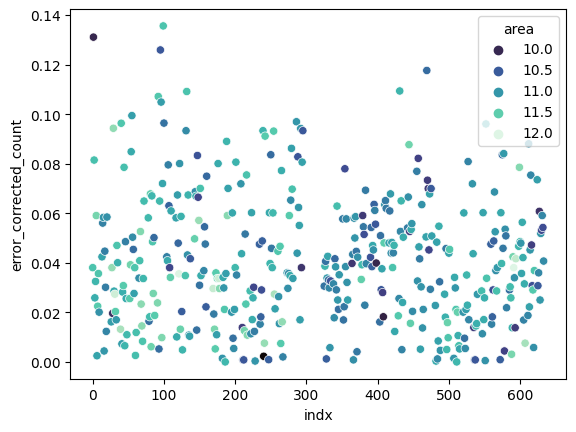

In [72]:
sns.scatterplot(data=df2,x = 'indx', y = 'error_corrected_count' ,hue='area',palette='mako')

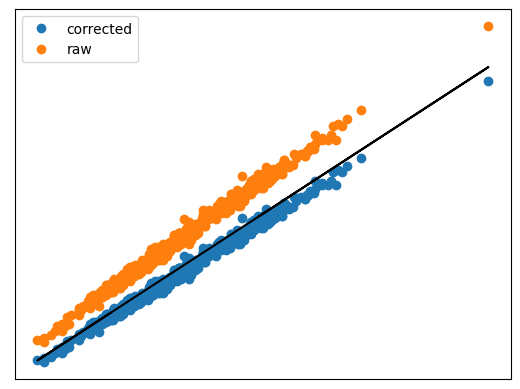

In [62]:
fig, ax = plt.subplots()
ax.plot(df2['manual'], df2['corrected'],df2['manual'], df2['raw'], marker = 'o',linestyle=' ')
ax.plot(df2['manual'], df2['manual'], color = 'k')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax.set_yticklabels([])
ax.set_yticks([])

ax.legend(['corrected','raw'])

In [55]:
def plot_column_with_permutation(df, column_name, hue_column):
    # Get the values of the specified column and permute them randomly
    column_values = df[column_name].values
    permuted_order = np.random.permutation(len(column_values))
    permuted_column = column_values[permuted_order]
    
    # Get the values of the hue column and permute them using the same order
    hue_values = df[hue_column].values
    permuted_hue = hue_values[permuted_order]
    
    # Create a DataFrame with the permuted column values and permuted hue column values
    permuted_df = pd.DataFrame({column_name: permuted_column, hue_column: permuted_hue})
    
    x = np.arange(len(permuted_column))
 
    # Reset the index of the combined DataFrame
    permuted_df = permuted_df.reset_index(drop=True)

    # Plot using Seaborn with hue set to the specified column
    sns.scatterplot(data=permuted_df, x=x, y=column_name, hue=hue_column)

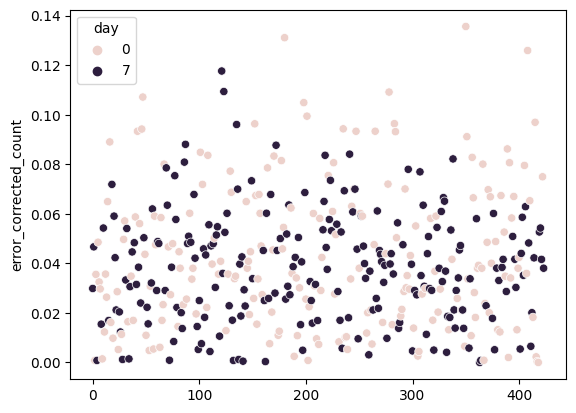

In [58]:
plot_column_with_permutation(df2, 'error_corrected_count','day')